# Many optimal policies for different p

This notebook explores how the optimal policy for the generalized p-mean changes with different values of p. In particular, we generate a set of vectors representing different policies and compute the generalized p-mean for each policy across a range of p values. The goal is to visualize how the optimal policy shifts as p varies, and show that different policies can be optimal for different p values. We will generate $N = 50$ policies such that for each policy, there will be some $p \in [-\infty, 1]$ for which it is optimal. 

# Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.ticker as ticker
import colorsys
from src.p_mean import generalized_p_mean, generate_p_grid, get_optimum_vector, get_optimum_value

plt.rcParams['figure.dpi'] = 300


# Define a color palette

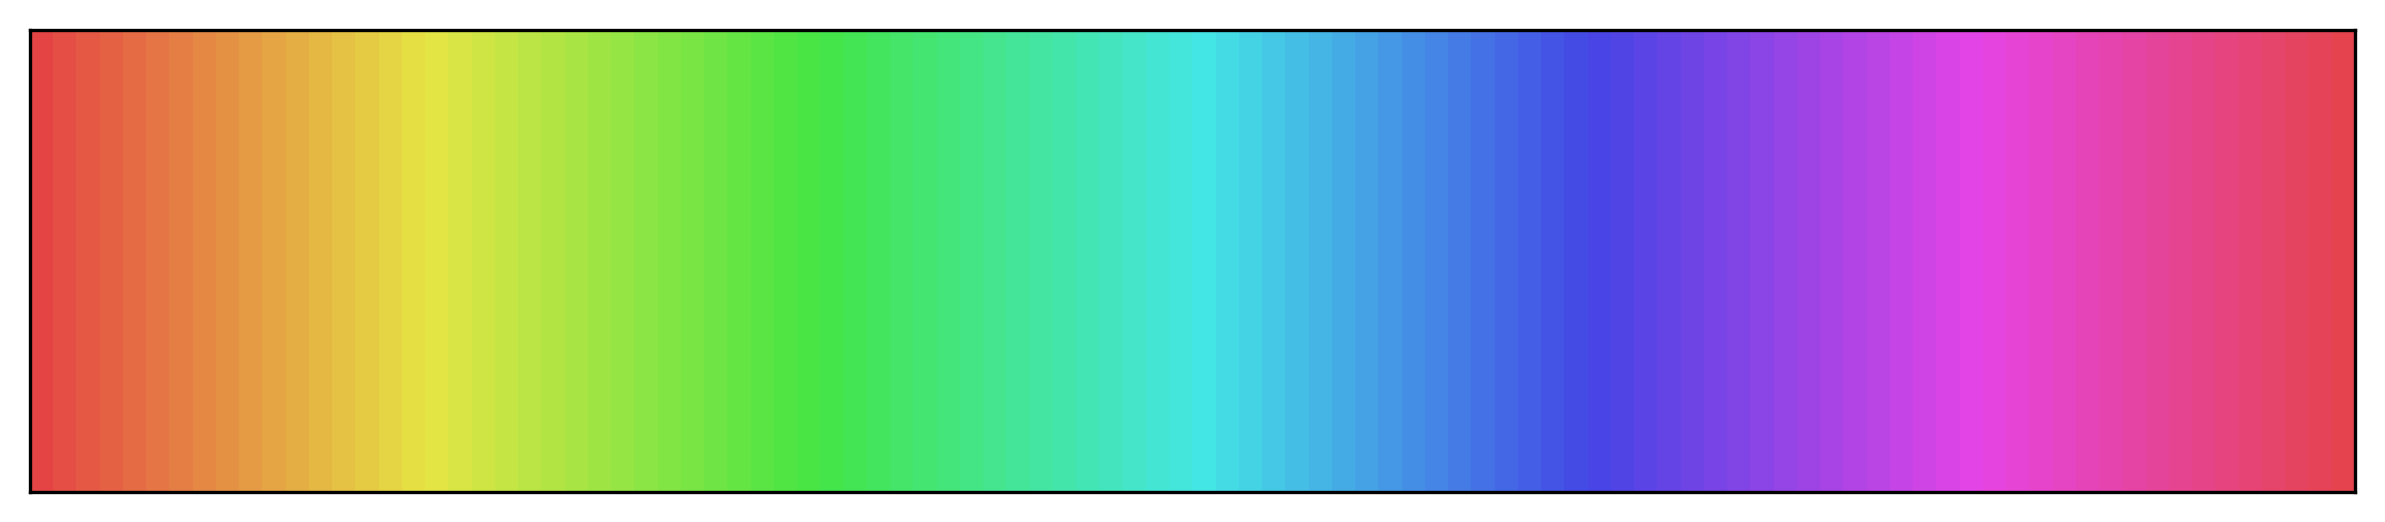

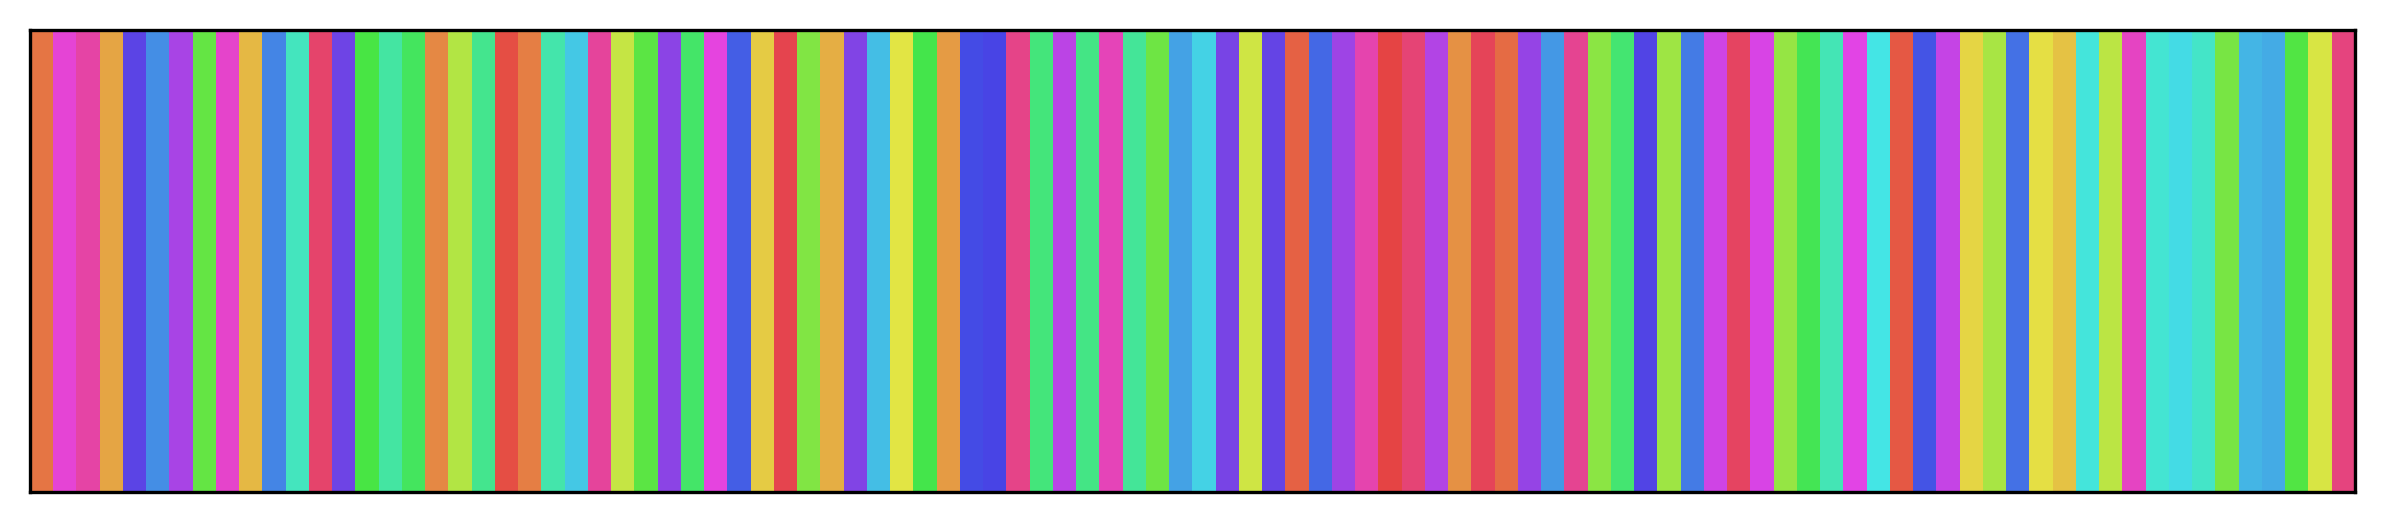

In [3]:
def generate_palette(n=100):
    colors = [colorsys.hsv_to_rgb(i/n, 0.7, 0.9) for i in range(n)]  # Vary hue
    return [(int(r*255), int(g*255), int(b*255)) for r, g, b in colors]

def display_palette(colors):
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.imshow([colors], extent=[0, len(colors), 0, 1], aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

palette = generate_palette(100)
display_palette(palette)

# Randomly shuffle
np.random.shuffle(palette)

display_palette(palette)

# Helper functions

In [4]:
def plot_vector(x, p_grid, ax, label=None, color=None):
    """
    Plot the generalized p-mean for a given vector x across a grid of p values.
    :param x: A vector representing a policy.
    :param p_grid: A grid of p values.
    :param ax: The matplotlib axis to plot on.
    :param label: A label for the plot.
    :param color: The color for the plot line.
    :return: The matplotlib axis with the plot.
    """
    p_mean_values = [generalized_p_mean(x, p) for p in p_grid]

    if color:
        ax.plot(p_grid, p_mean_values, label=label, color=color)
    else:
        ax.plot(p_grid, p_mean_values, label=label)

    return ax


def exp_vector(N, gamma, t):
    """
    Generate a vector of length N with entries proportional to 1 - exp(-a * i).
    """
    # L = np.log(N, gamma)/2
    x = [gamma ** (-t)] + [gamma ** t for _ in range(N - 1)]
    return tuple(x)

# Generate a set of vectors representing different policies

In [6]:
N = 50      # Dimension/number of stakeholders. There will be N policies, each of dimension N.

vectors = [
    exp_vector(N=N, gamma=1.0025, t=i) for i in range(N)
]

# Plot the generalized p-mean for each vector as a function of p

Text(0.5, 1.0, 'Generalized p-mean for different policies')

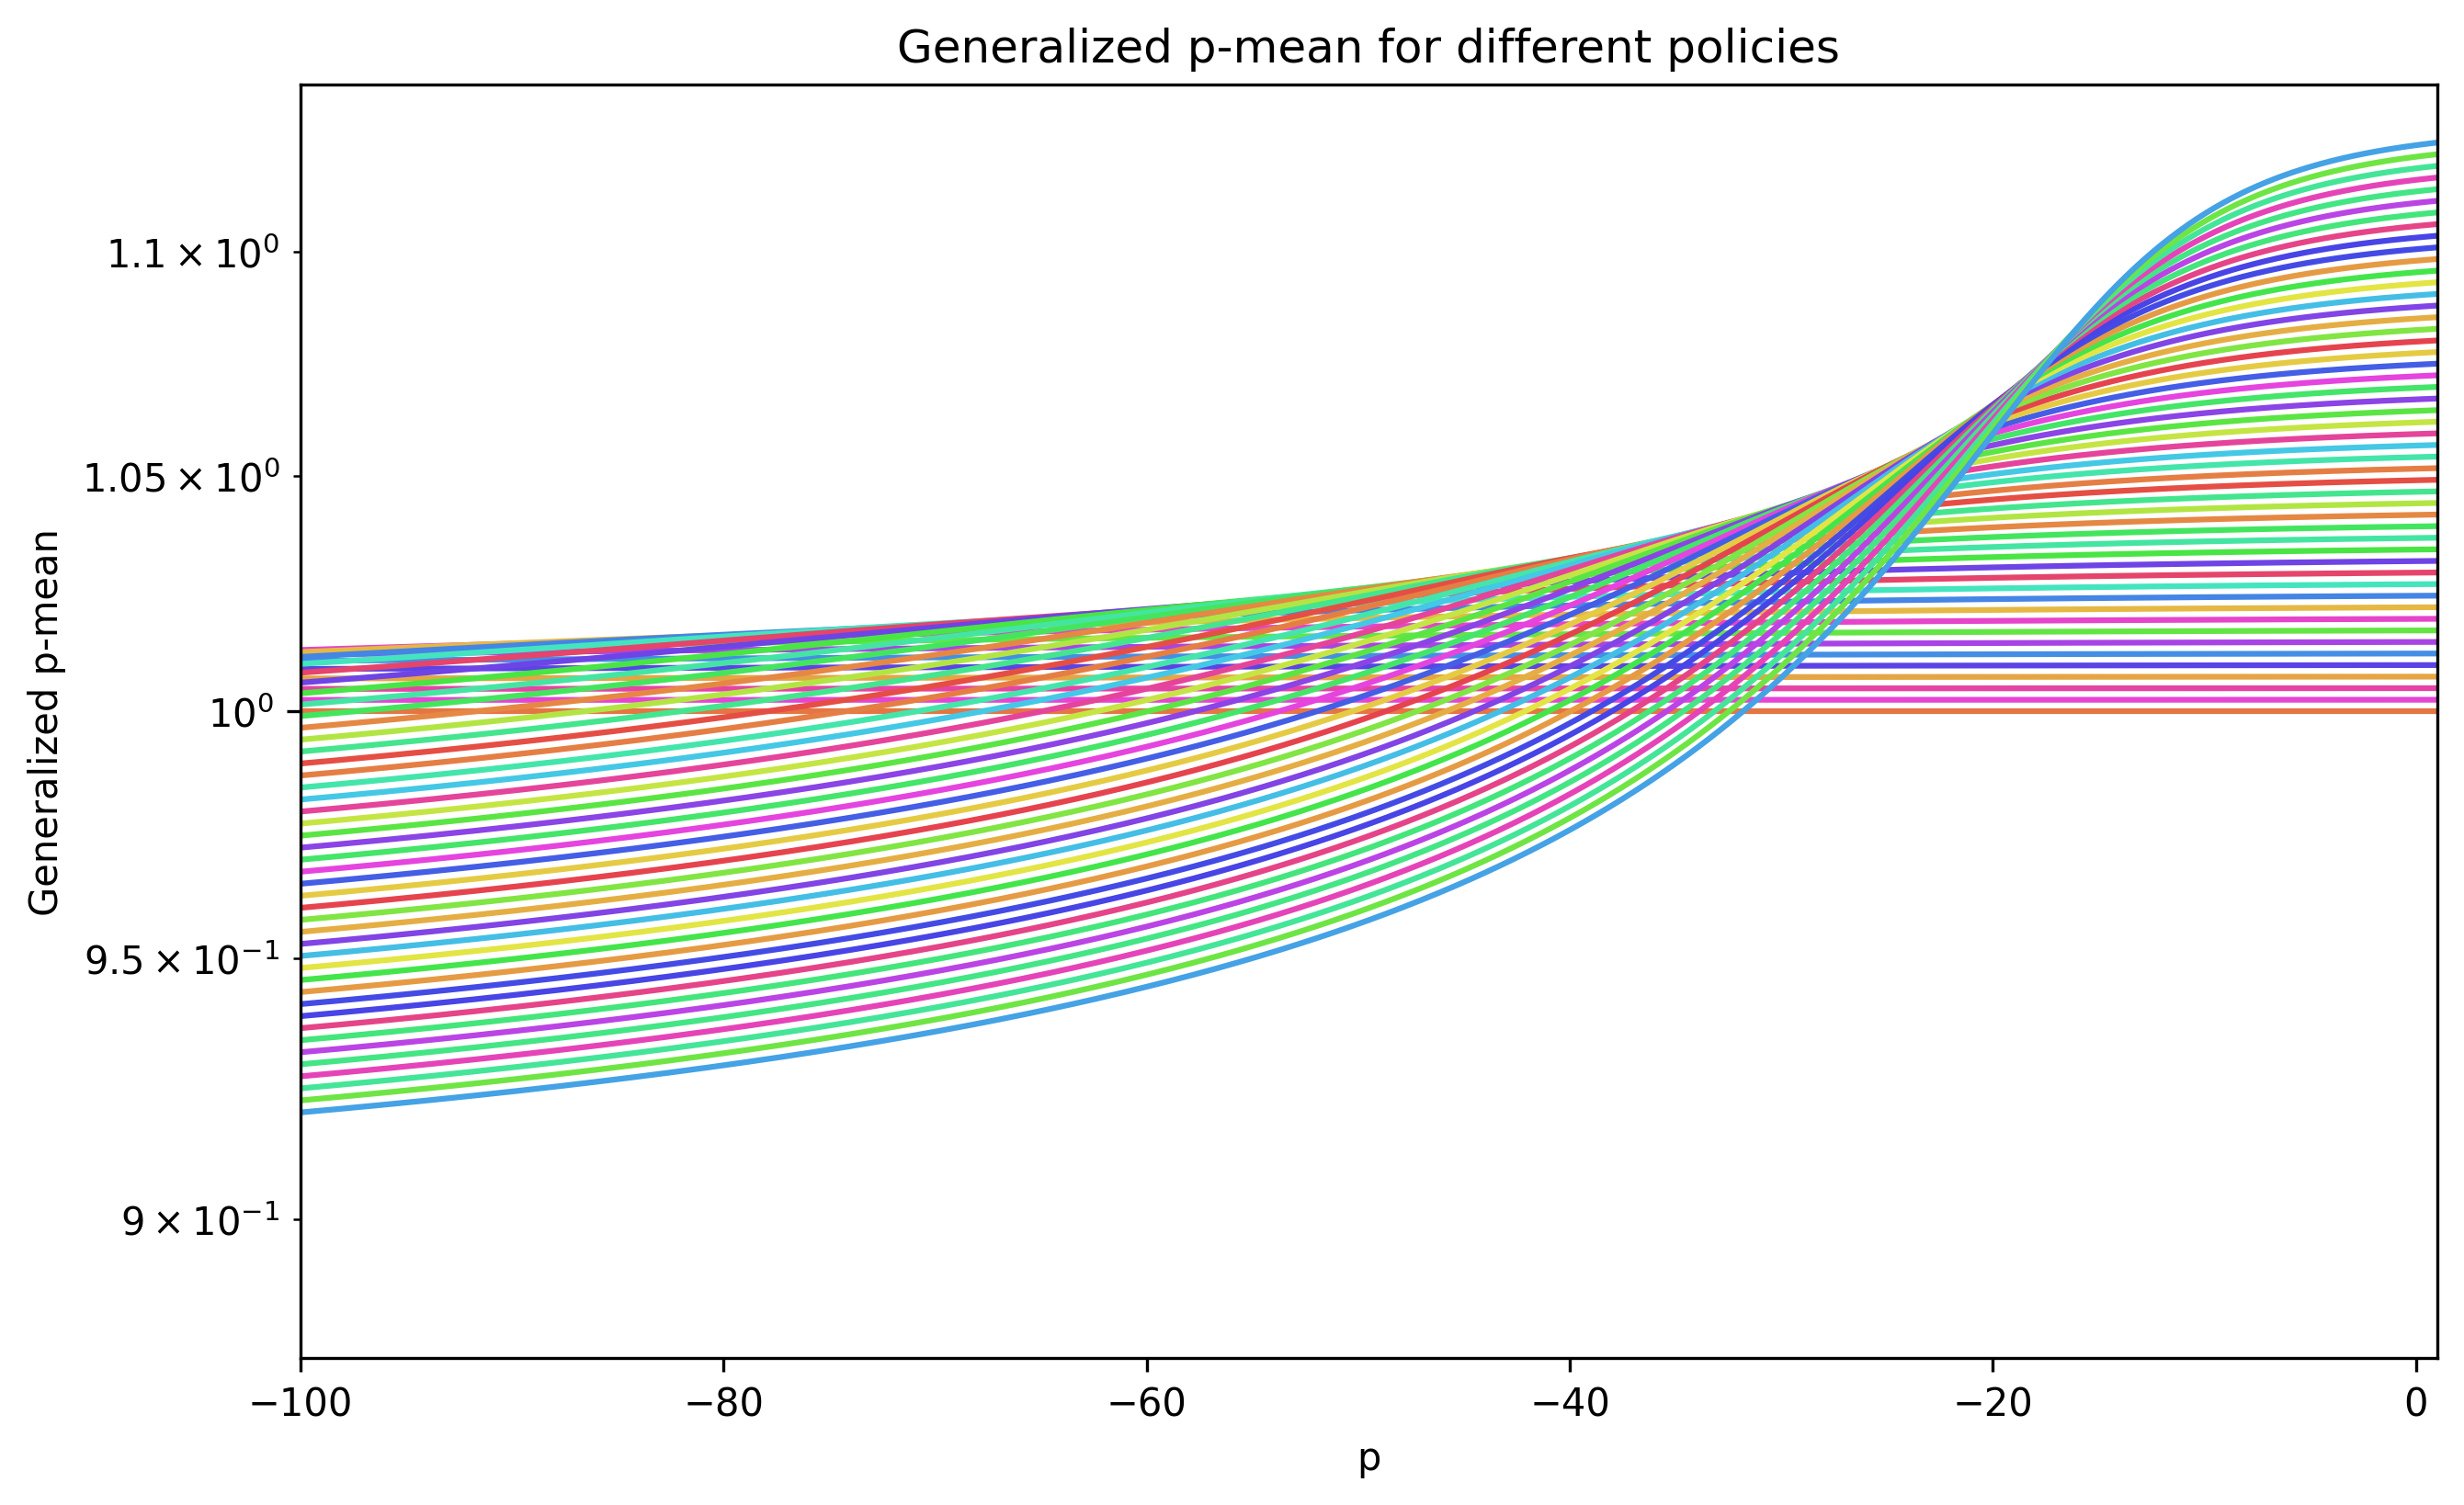

In [7]:
# Generate a grid of p values
p_grid = generate_p_grid(N, alpha=0.0001, grid_size=1000, p_mid=-50)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each vector's generalized p-mean across the grid of p values
for i in range(len(vectors)):
    color = [c/255 for c in palette[i % len(palette)]]
    ax = plot_vector(vectors[i], p_grid, ax, label=f'Policy {i}', color=color)

ax.set_xlim(-100, 1)
ax.set_xlabel('p')

ax.set_ylabel('Generalized p-mean')
ax.set_yscale('log')

ax.set_title('Generalized p-mean for different policies')


# Find the optimal policy for each p value and plot the results

In [8]:
optimal_vectors = {}
optimal_means = {}

for p in tqdm(p_grid):
    opt_vector = get_optimum_vector(vectors=vectors, p=p)
    opt_mean = get_optimum_value(vectors=vectors, p=p)
    optimal_vectors[p] = opt_vector
    optimal_means[p] = opt_mean
    

100%|██████████| 1000/1000 [00:02<00:00, 415.71it/s]


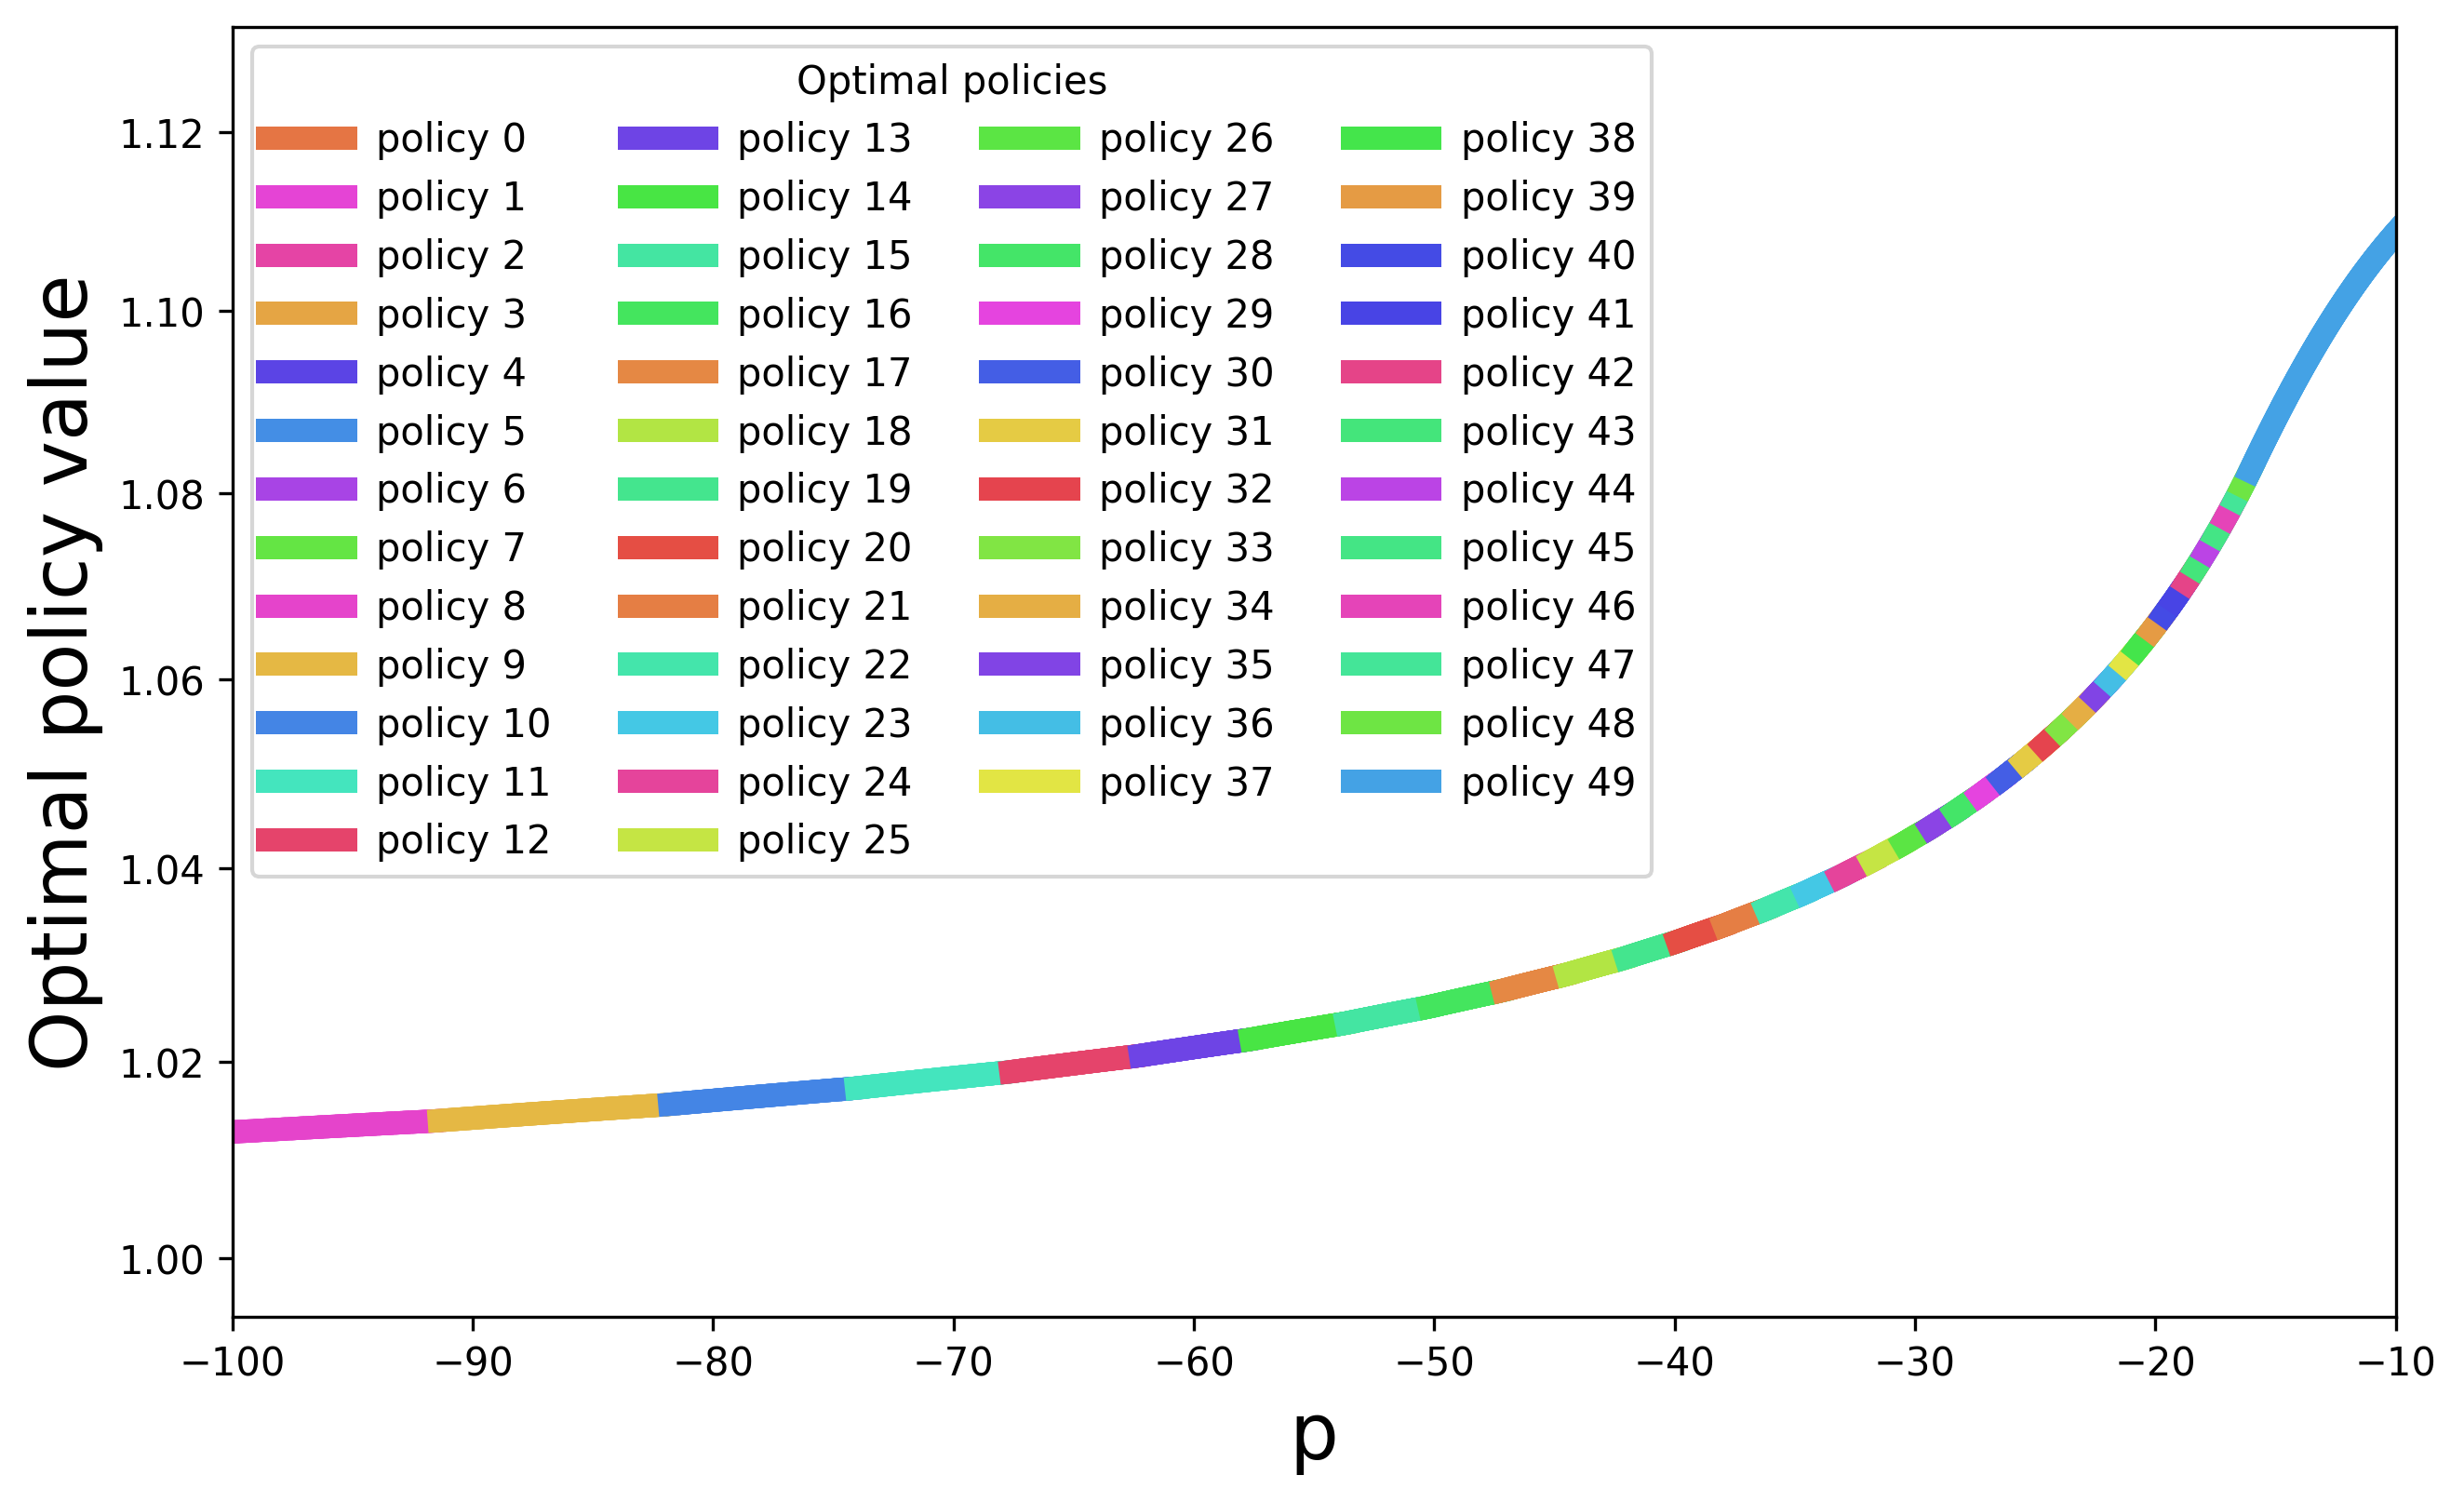

In [12]:
plt.figure(figsize=(10, 6))
unique_optima = set(optimal_vectors.values())
covered = {x: False for x in unique_optima}


for i in range(len(p_grid) - 1):
    p, p_next = p_grid[i], p_grid[i + 1]
    optimal_x = optimal_vectors[p]

    color = palette[vectors.index(optimal_x) % len(palette)]
    color = [c/255 for c in color]

    if not covered[optimal_x]:
        plt.plot(
            [p, p_next], [optimal_means[p], optimal_means[p_next]], color=color, label=f'policy {vectors.index(optimal_x)}', lw=6
        )
        covered[optimal_x] = True
    else:
        plt.plot([p, p_next], [optimal_means[p], optimal_means[p_next]], color=color, lw=6)

plt.yscale('log')
plt.ylabel('Optimal policy value', fontsize=20)

plt.legend(fontsize=10, ncol=4, title='Optimal policies')

plt.xlabel('p', fontsize=20)
plt.xlim(-100, -10)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=None))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

plt.savefig('../plots/many_optimal_policies_for_different_p.png', bbox_inches='tight', dpi=300)
